In [ ]:
import pandas as pd

# Carregar direto do Brasil.IO (não precisa baixar manualmente se tiver internet)
url = "https://data.brasil.io/dataset/covid19/caso.csv.gz"
df = pd.read_csv(url, compression="gzip")

# Ver estrutura
print(df.head())
print(df.columns)

# Manter apenas colunas principais
df = df[["date", "state", "city", "confirmed", "deaths", "estimated_population_2019"]]

# Converter datas
df["date"] = pd.to_datetime(df["date"])

# Exemplo: últimos dados por município
dados_atuais = df.sort_values("date").groupby("city").tail(1)

# Exemplo: totais por estado na data mais recente
totais_estado = df.sort_values("date").groupby(["state", "date"]).tail(1)

print(dados_atuais.head())
print(totais_estado.head())

         date state city place_type  confirmed  deaths  order_for_place  \
0  2022-03-27    AP  NaN      state     160328    2122              734   
1  2022-03-26    AP  NaN      state     160321    2122              733   
2  2022-03-25    AP  NaN      state     160314    2122              732   
3  2022-03-24    AP  NaN      state     160301    2122              731   
4  2022-03-23    AP  NaN      state     160288    2122              730   

   is_last  estimated_population_2019  estimated_population  city_ibge_code  \
0     True                   845731.0              861773.0            16.0   
1    False                   845731.0              861773.0            16.0   
2    False                   845731.0              861773.0            16.0   
3    False                   845731.0              861773.0            16.0   
4    False                   845731.0              861773.0            16.0   

   confirmed_per_100k_inhabitants  death_rate  
0                     1860

/tmp/ipython-input-1065827883.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=populacao_estado, x="state", y="populacao_total", palette="Reds")


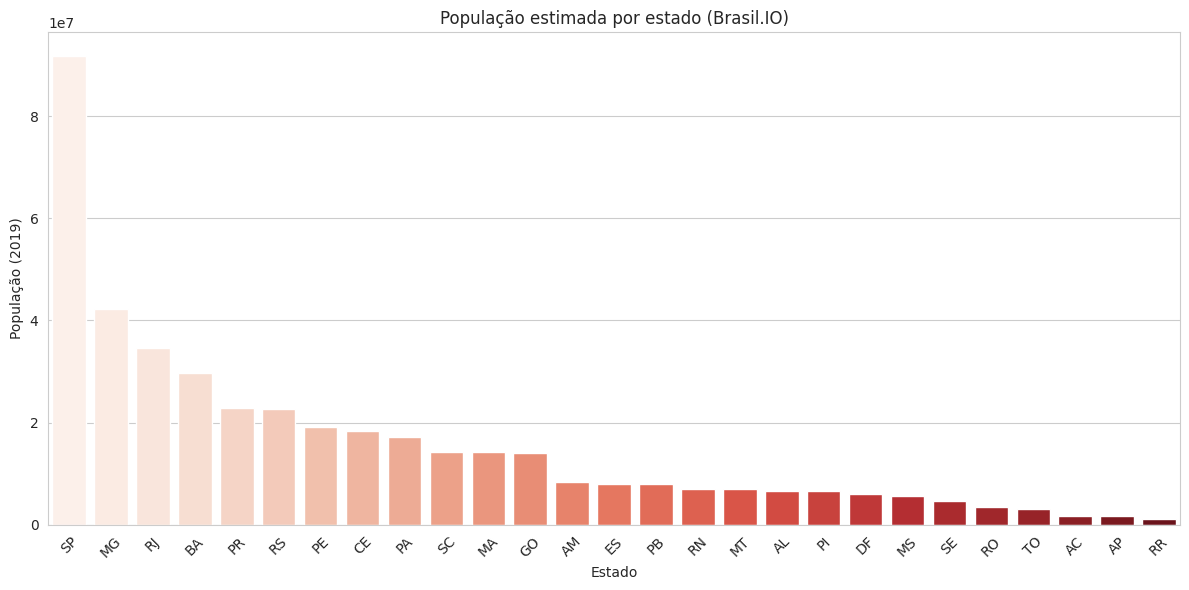

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar direto do Brasil.IO
url = "https://data.brasil.io/dataset/covid19/caso.csv.gz"
df = pd.read_csv(url, compression="gzip")

# Selecionar colunas de interesse
df = df[["state", "city", "estimated_population_2019"]]

# Evitar repetição (cada cidade aparece em várias datas)
df_cidades = df.drop_duplicates(subset=["state", "city"])

# Somar população das cidades por estado
populacao_estado = (
    df_cidades.groupby("state")["estimated_population_2019"]
    .sum()
    .reset_index()
    .rename(columns={"estimated_population_2019": "populacao_total"})
)

# Ordenar do maior para o menor
populacao_estado = populacao_estado.sort_values("populacao_total", ascending=False)

# Estilo e paleta iguais ao do gráfico de casos
plt.figure(figsize=(12,6))
sns.barplot(data=populacao_estado, x="state", y="populacao_total", palette="Reds")

plt.xticks(rotation=45)
plt.xlabel("Estado")
plt.ylabel("População (2019)")
plt.title("População estimada por estado (Brasil.IO)")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Carregar dados do Brasil.IO (todos os registros históricos)
url = "https://data.brasil.io/dataset/covid19/caso.csv.gz"
df = pd.read_csv(url, compression="gzip")

# Converter data
df["date"] = pd.to_datetime(df["date"])

# --------- DADOS MAIS RECENTES POR MUNICÍPIO ---------
municipios_atuais = (
    df[df["place_type"] == "city"]       # apenas municípios
    .sort_values("date")
    .groupby("city", as_index=False)
    .last()                              # pega o último registro de cada município
)

# --------- DADOS MAIS RECENTES POR ESTADO ---------
estados_atuais = (
    df[df["place_type"] == "state"]      # apenas estados
    .sort_values("date")
    .groupby("state", as_index=False)
    .last()
)

# Salvar CSVs prontos
municipios_atuais.to_csv("covid_municipios_atuais.csv", index=False)
estados_atuais.to_csv("covid_estados_atuais.csv", index=False)

print("✅ Arquivos gerados: covid_municipios_atuais.csv e covid_estados_atuais.csv")


✅ Arquivos gerados: covid_municipios_atuais.csv e covid_estados_atuais.csv


In [ ]:
import pandas as pd

# Carregar dados Brasil.IO
url = "https://data.brasil.io/dataset/covid19/caso.csv.gz"
df = pd.read_csv(url, compression="gzip")
df["date"] = pd.to_datetime(df["date"])

# Filtrar apenas estados e pegar o registro mais recente
estados_atuais = (
    df[df["place_type"] == "state"]
    .sort_values("date")
    .groupby("state", as_index=False)
    .last()
)

# Calcular casos por 100 mil habitantes
estados_atuais["cases_per_100k"] = (
    estados_atuais["confirmed"] / estados_atuais["estimated_population_2019"] * 100000
)

# Calcular taxa de letalidade
estados_atuais["death_rate"] = estados_atuais["deaths"] / estados_atuais["confirmed"]

# Selecionar colunas importantes
estados_final = estados_atuais[
    ["state", "confirmed", "deaths", "estimated_population_2019", "cases_per_100k", "death_rate"]
]

print(estados_final)


   state  confirmed  deaths  estimated_population_2019  cases_per_100k  \
0     AC     123808    1992                   881935.0    14038.222772   
1     AL     295972    6869                  3337357.0     8868.454888   
2     AM     581070   14151                  4144597.0    14019.939695   
3     AP     160328    2122                   845731.0    18957.328039   
4     BA    1530054   29658                 14873064.0    10287.416231   
5     CE    1239746   26708                  9132078.0    13575.727233   
6     DF     691353   11573                  3015268.0    22928.409680   
7     ES    1037188   14323                  4018650.0    25809.363841   
8     GO    1269853   26212                  7018354.0    18093.316467   
9     MA     424199   10869                  7075181.0     5995.592198   
10    MG    3317401   60767                 21168791.0    15671.187835   
11    MS     523565   10486                  2778986.0    18840.145290   
12    MT     724653   14854           

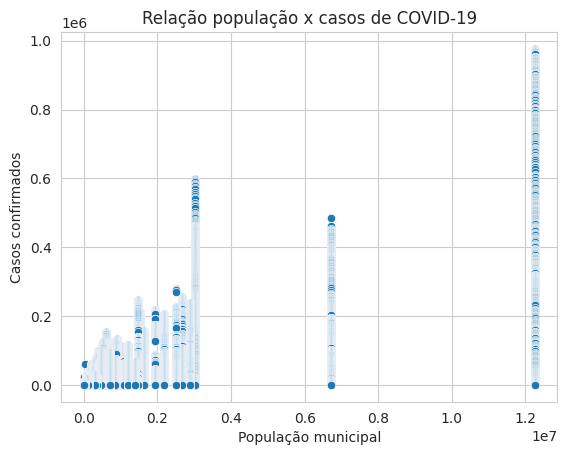

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df[df['place_type']=='city'], x='estimated_population_2019', y='confirmed')
plt.xlabel("População municipal")
plt.ylabel("Casos confirmados")
plt.title("Relação população x casos de COVID-19")
plt.show()


In [ ]:
import pandas as pd

# Supondo que você já tenha carregado seu dataset do Brasil.IO
df["date"] = pd.to_datetime(df["date"])

# Filtrar apenas estados
estados_atuais = (
    df[df["place_type"] == "state"]
    .sort_values("date")
    .groupby("state", as_index=False)
    .last()
)

# Calcular casos por 100 mil habitantes
estados_atuais["cases_per_100k"] = (
    estados_atuais["confirmed"] / estados_atuais["estimated_population_2019"] * 100000
)

# Calcular taxa de letalidade
estados_atuais["death_rate"] = estados_atuais["deaths"] / estados_atuais["confirmed"]


/tmp/ipython-input-463917114.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=estados_sorted, x="state", y="cases_per_100k", palette="Reds")


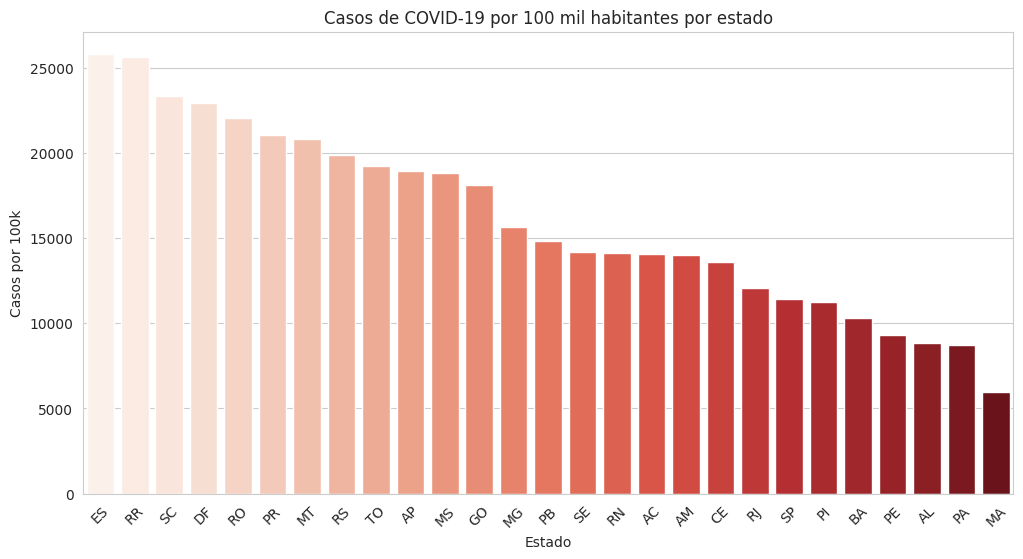

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ordenar por casos/100k
estados_sorted = estados_atuais.sort_values("cases_per_100k", ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=estados_sorted, x="state", y="cases_per_100k", palette="Reds")
plt.title("Casos de COVID-19 por 100 mil habitantes por estado")
plt.ylabel("Casos por 100k")
plt.xlabel("Estado")
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-1380396407.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=estados_sorted, x="state", y="death_rate_relativa", palette="Oranges")


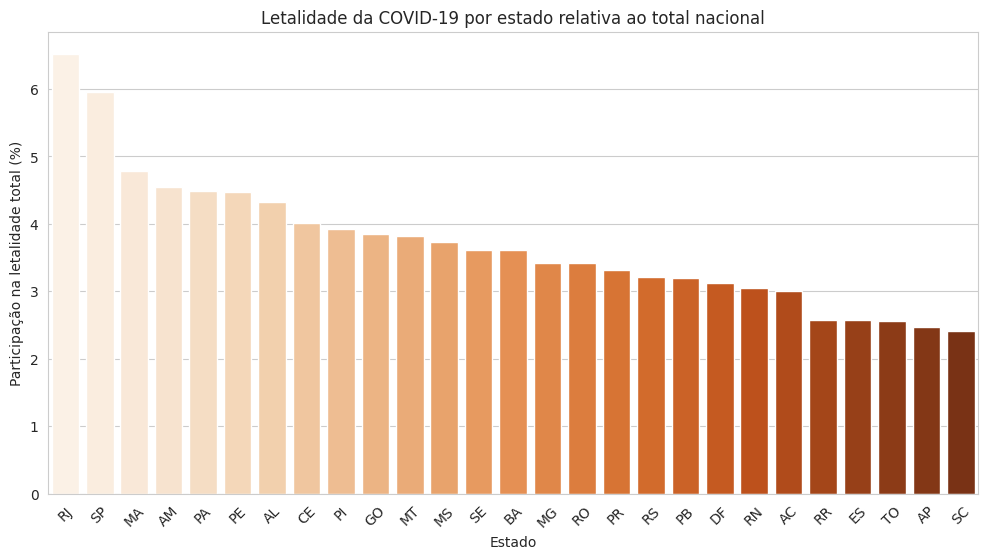

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar cópia do dataframe
estados_sorted = estados_atuais.copy()

# Garantir que death_rate esteja em fração (0 a 1)
if estados_sorted["death_rate"].max() > 1:
    estados_sorted["death_rate_frac"] = estados_sorted["death_rate"] / 100
else:
    estados_sorted["death_rate_frac"] = estados_sorted["death_rate"]

# Calcular participação relativa de cada estado na letalidade total
total_lethalidade = estados_sorted["death_rate_frac"].sum()
estados_sorted["death_rate_relativa"] = (estados_sorted["death_rate_frac"] / total_lethalidade) * 100

# Ordenar por letalidade relativa
estados_sorted = estados_sorted.sort_values("death_rate_relativa", ascending=False)

# Plotar gráfico
plt.figure(figsize=(12,6))
sns.barplot(data=estados_sorted, x="state", y="death_rate_relativa", palette="Oranges")

plt.ylabel("Participação na letalidade total (%)")
plt.xlabel("Estado")
plt.title("Letalidade da COVID-19 por estado relativa ao total nacional")
plt.xticks(rotation=45)

plt.show()


/tmp/ipython-input-3743165496.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumo = municipios.groupby("pop_faixa").agg(
/tmp/ipython-input-3743165496.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resumo, x="pop_faixa", y="media_casos", palette="Reds", ax=ax1)


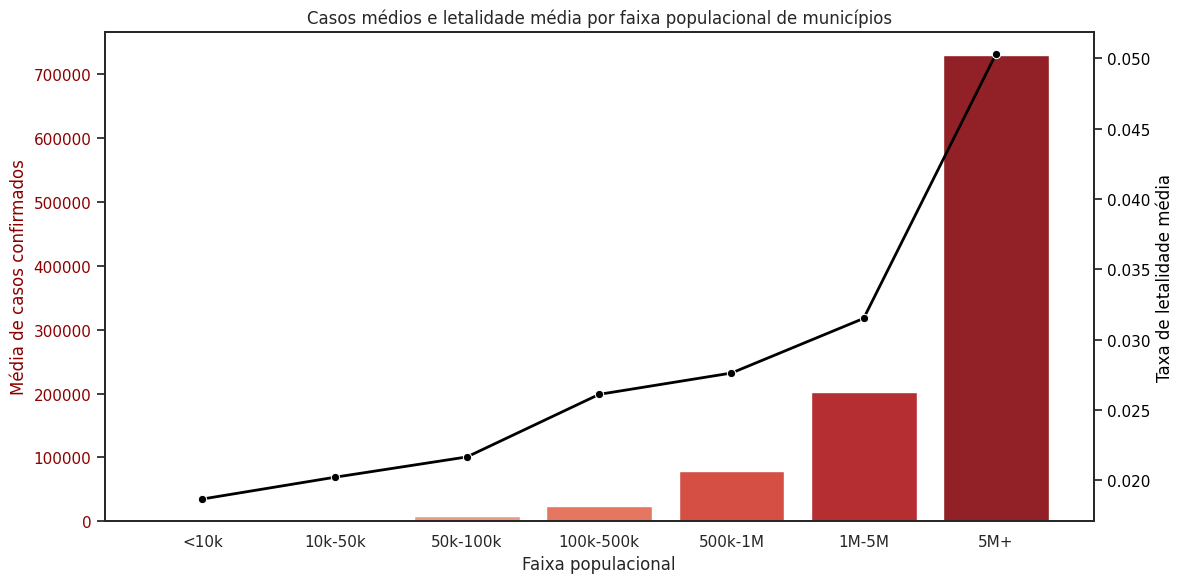

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo limpo, sem grid
sns.set_style("white")

# Filtrar apenas municípios
municipios = df[df["place_type"] == "city"].sort_values("date").groupby("city", as_index=False).last()

# Criar faixas de população
bins = [0, 10000, 50000, 100000, 500000, 1000000, 5000000, 30000000]
labels = ["<10k","10k-50k","50k-100k","100k-500k","500k-1M","1M-5M","5M+"]
municipios["pop_faixa"] = pd.cut(municipios["estimated_population_2019"], bins=bins, labels=labels)

# Calcular casos médios e taxa de letalidade por faixa
resumo = municipios.groupby("pop_faixa").agg(
    media_casos=("confirmed", "mean"),
    media_letalidade=("deaths", lambda x: (x.sum() / municipios.loc[x.index, "confirmed"].sum()))
).reset_index()

# Criar gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras com paleta vermelha
sns.barplot(data=resumo, x="pop_faixa", y="media_casos", palette="Reds", ax=ax1)
ax1.set_xlabel("Faixa populacional")
ax1.set_ylabel("Média de casos confirmados", color="darkred")
ax1.tick_params(axis='y', labelcolor="darkred")

# Linha de letalidade
ax2 = ax1.twinx()
sns.lineplot(data=resumo, x="pop_faixa", y="media_letalidade", color="black", marker="o", linewidth=2, ax=ax2)
ax2.set_ylabel("Taxa de letalidade média", color="black")
ax2.tick_params(axis='y', labelcolor="black")

# Título
plt.title("Casos médios e letalidade média por faixa populacional de municípios")

# Remover linhas do meio (grid)
ax1.grid(False)
ax2.grid(False)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Filtrar apenas municípios e pegar a última data de cada cidade
municipios = df[df["place_type"] == "city"].sort_values("date").groupby("city", as_index=False).last()

# Calcular letalidade de cada município
municipios["death_rate"] = municipios["deaths"] / municipios["confirmed"]

# Calcular correlações
corr_pop_casos = municipios["estimated_population_2019"].corr(municipios["confirmed"])
corr_pop_letalidade = municipios["estimated_population_2019"].corr(municipios["death_rate"])

print(f"Correlação população x casos: {corr_pop_casos:.2f}")
print(f"Correlação população x letalidade: {corr_pop_letalidade:.2f}")


Correlação população x casos: 0.94
Correlação população x letalidade: 0.09


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# preparar dados (ajuste nomes se necessário)
# usa municipios (último registro por cidade) e estados_atuais (último por estado)
municipios = df[df["place_type"] == "city"].sort_values("date").groupby("city", as_index=False).last().copy()
estados = df[df["place_type"] == "state"].sort_values("date").groupby("state", as_index=False).last().copy()

# garantir colunas numéricas e sem zeros problemáticos
municipios = municipios.dropna(subset=["estimated_population_2019","confirmed","deaths"])
municipios["estimated_population_2019"] = municipios["estimated_population_2019"].astype(float)
municipios["confirmed"] = municipios["confirmed"].astype(float)
municipios["deaths"] = municipios["deaths"].astype(float)
municipios = municipios[municipios["estimated_population_2019"] > 0]
municipios["death_rate"] = municipios["deaths"] / municipios["confirmed"]
municipios = municipios.replace([np.inf, -np.inf], np.nan).dropna(subset=["death_rate"])

# opção: criar coluna de casos por 100k (útil para alguns testes)
municipios["cases_per_100k"] = municipios["confirmed"] / municipios["estimated_population_2019"] * 100000


In [ ]:
# Pearson (linear) e Spearman (monótona)
x = municipios["estimated_population_2019"]
y_cases = municipios["confirmed"]
y_leth = municipios["death_rate"]

pearson_cases = stats.pearsonr(x, y_cases)      # (r, p-value)
spearman_cases = stats.spearmanr(x, y_cases)    # (rho, p-value)

pearson_leth = stats.pearsonr(x, y_leth)
spearman_leth = stats.spearmanr(x, y_leth)

print("População vs Casos (Pearson r, p):", pearson_cases)
print("População vs Casos (Spearman rho, p):", spearman_cases)
print("")
print("População vs Letalidade (Pearson r, p):", pearson_leth)
print("População vs Letalidade (Spearman rho, p):", spearman_leth)


População vs Casos (Pearson r, p): PearsonRResult(statistic=np.float64(0.9393828679125019), pvalue=np.float64(0.0))
População vs Casos (Spearman rho, p): SignificanceResult(statistic=np.float64(0.858415575806197), pvalue=np.float64(0.0))

População vs Letalidade (Pearson r, p): PearsonRResult(statistic=np.float64(0.0881619264216932), pvalue=np.float64(1.297434138363406e-10))
População vs Letalidade (Spearman rho, p): SignificanceResult(statistic=np.float64(0.17984095911668302), pvalue=np.float64(9.560280465639456e-40))


In [ ]:
# log-transform (adiciona 1 para evitar log(0))
x_log = np.log10(x + 1)
y_cases_log = np.log10(y_cases + 1)

pearson_log_cases = stats.pearsonr(x_log, y_cases_log)
spearman_log_cases = stats.spearmanr(x_log, y_cases_log)

print("Log População vs Log Casos (Pearson r, p):", pearson_log_cases)
print("Log População vs Log Casos (Spearman rho, p):", spearman_log_cases)


Log População vs Log Casos (Pearson r, p): PearsonRResult(statistic=np.float64(0.8873109322890137), pvalue=np.float64(0.0))
Log População vs Log Casos (Spearman rho, p): SignificanceResult(statistic=np.float64(0.858415575806197), pvalue=np.float64(0.0))


In [ ]:
# Regressão simples com log (melhor ajuste em dados com variação muito grande)
X = sm.add_constant(x_log)  # intercept
model = sm.OLS(y_cases_log, X).fit()
print(model.summary())   # veja coeficiente, p-value e R-squared


                            OLS Regression Results                            
Dep. Variable:              confirmed   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                 1.960e+04
Date:                Mon, 06 Oct 2025   Prob (F-statistic):               0.00
Time:                        12:40:10   Log-Likelihood:                -394.50
No. Observations:                5297   AIC:                             793.0
Df Residuals:                    5295   BIC:                             806.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

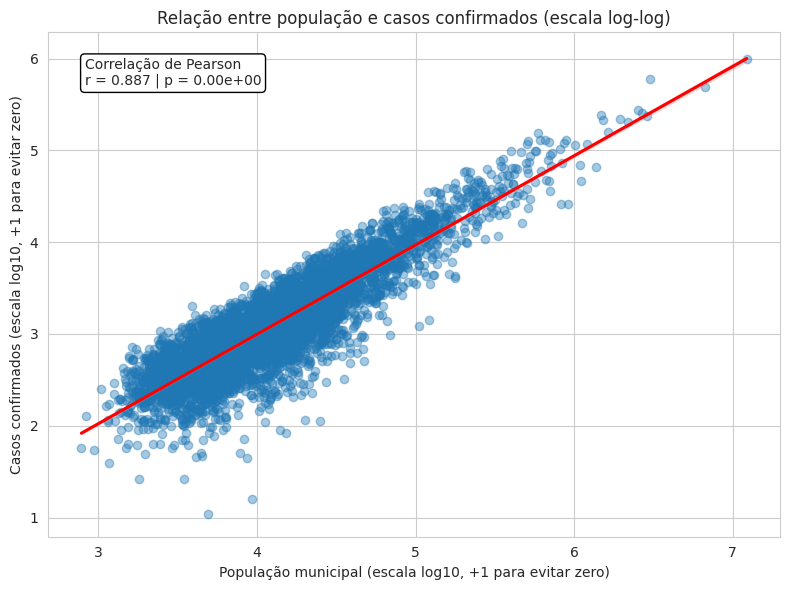

In [ ]:
plt.figure(figsize=(8, 6))

# Dispersão com regressão linear
sns.regplot(
    x=x_log,
    y=y_cases_log,
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'red'}
)

# Rótulos dos eixos
plt.xlabel("População municipal (escala log10, +1 para evitar zero)")
plt.ylabel("Casos confirmados (escala log10, +1 para evitar zero)")

# Título do gráfico
plt.title("Relação entre população e casos confirmados (escala log-log)")

# Anotar coeficiente de correlação de Pearson
r, p = pearson_log_cases
plt.annotate(
    f"Correlação de Pearson\nr = {r:.3f} | p = {p:.2e}",
    xy=(0.05, 0.95), xycoords='axes fraction',
    fontsize=10, ha='left', va='top',
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black")
)

plt.tight_layout()
plt.show()


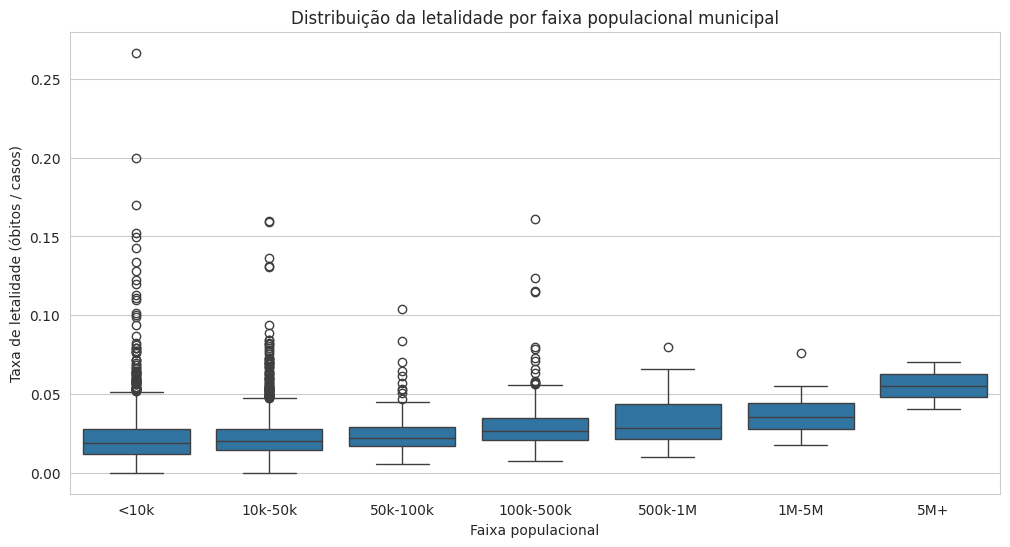

In [ ]:
# criar faixas (igual ao seu gráfico anterior)
bins = [0, 10000, 50000, 100000, 500000, 1000000, 5000000, 30000000]
labels = ["<10k","10k-50k","50k-100k","100k-500k","500k-1M","1M-5M","5M+"]
municipios["pop_faixa"] = pd.cut(municipios["estimated_population_2019"], bins=bins, labels=labels)

plt.figure(figsize=(12,6))
sns.boxplot(data=municipios, x="pop_faixa", y="death_rate")
plt.ylabel("Taxa de letalidade (óbitos / casos)")
plt.xlabel("Faixa populacional")
plt.title("Distribuição da letalidade por faixa populacional municipal")
plt.show()


In [ ]:
# tabela de correlações
corr_table = pd.DataFrame({
    "metric": ["pearson_cases", "spearman_cases", "pearson_leth", "spearman_leth"],
    "stat": [pearson_cases[0], spearman_cases.correlation, pearson_leth[0], spearman_leth.correlation],
    "p_value": [pearson_cases[1], spearman_cases.pvalue, pearson_leth[1], spearman_leth.pvalue]
})
print(corr_table)

# resumo por faixa: média casos, média letalidade, população média
resumo_faixa = municipios.groupby("pop_faixa").agg(
    n_municipios = ("city", "nunique"),
    media_pop = ("estimated_population_2019", "mean"),
    media_casos = ("confirmed", "mean"),
    media_letalidade = ("death_rate", "mean"),
    mediana_letalidade = ("death_rate", "median")
).reset_index()
print(resumo_faixa)
resumo_faixa.to_csv("resumo_por_faixa_populacional.csv", index=False)
corr_table.to_csv("correlacoes_populacao.csv", index=False)


           metric      stat       p_value
0   pearson_cases  0.939383  0.000000e+00
1  spearman_cases  0.858416  0.000000e+00
2    pearson_leth  0.088162  1.297434e-10
3   spearman_leth  0.179841  9.560280e-40
   pop_faixa  n_municipios     media_pop    media_casos  media_letalidade  \
0       <10k          2352  5.190267e+03     604.394133          0.021689   
1    10k-50k          2299  2.158255e+04    2335.823836          0.022780   
2   50k-100k           332  6.844461e+04    8324.918675          0.024396   
3  100k-500k           268  1.943975e+05   23410.880597          0.030657   
4    500k-1M            30  6.511162e+05   79326.133333          0.033216   
5      1M-5M            14  1.829959e+06  201812.571429          0.037819   
6        5M+             2  9.485463e+06  730323.500000          0.055353   

   mediana_letalidade  
0            0.018634  
1            0.020425  
2            0.022101  
3            0.026743  
4            0.028680  
5            0.035328  
6    

/tmp/ipython-input-3701038826.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumo_faixa = municipios.groupby("pop_faixa").agg(


/tmp/ipython-input-2786420926.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=estados, y=leitos_totais_abs, palette="Blues", ax=ax[0])
/tmp/ipython-input-2786420926.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=estados, y=leitos_totais_percapita, palette="Greens", ax=ax[1])


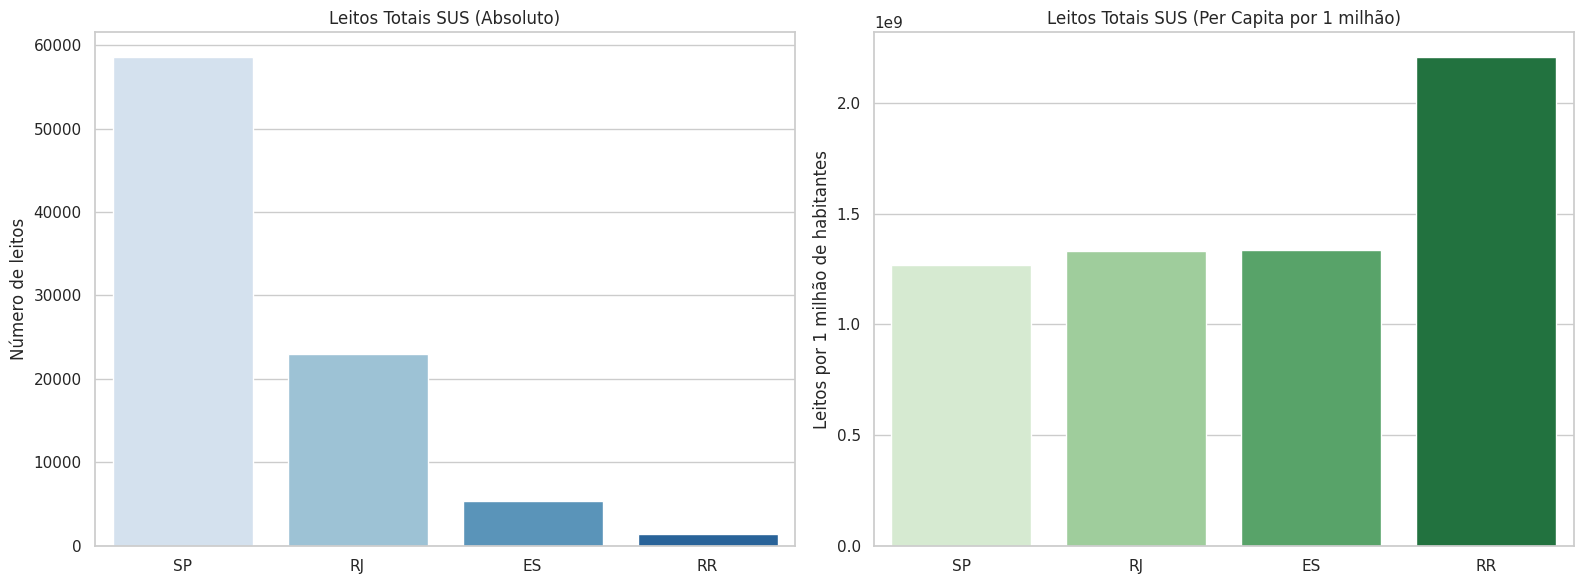

/tmp/ipython-input-2786420926.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=estados, y=leitos_criticos_abs, palette="Reds", ax=ax[0])
/tmp/ipython-input-2786420926.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=estados, y=leitos_criticos_percapita, palette="Oranges", ax=ax[1])


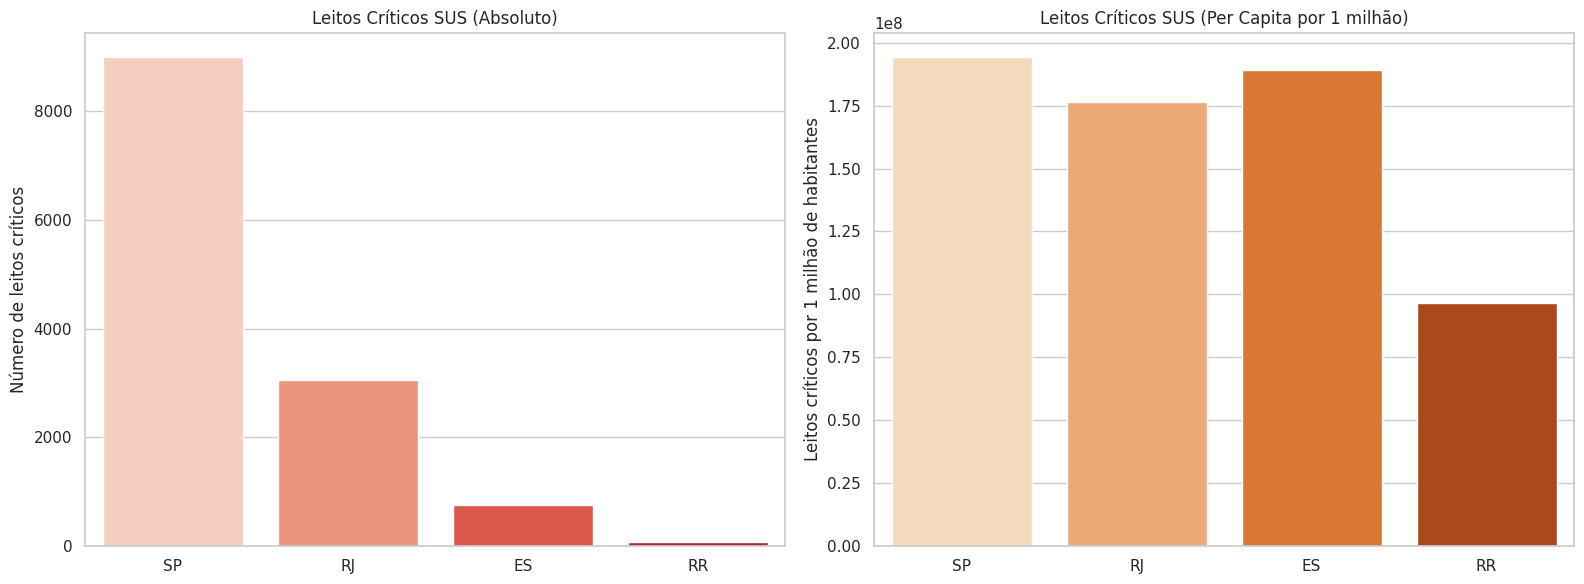

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Estados
estados = ["SP", "RJ", "ES", "RR"]

# População em milhões
populacao_milhoes = [46.3, 17.3, 4.0, 0.631]

# Leitos SUS totais (soma geral menos complementar)
leitos_totais_abs = [58605, 23001, 5336, 1393]
leitos_totais_percapita = [leitos_totais_abs[i] / populacao_milhoes[i] * 1e6 for i in range(4)]

# Leitos críticos SUS (complementar)
leitos_criticos_abs = [8993, 3053, 757, 61]
leitos_criticos_percapita = [leitos_criticos_abs[i] / populacao_milhoes[i] * 1e6 for i in range(4)]

# --- Gráfico 1: Leitos totais ---
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x=estados, y=leitos_totais_abs, palette="Blues", ax=ax[0])
ax[0].set_title("Leitos Totais SUS (Absoluto)")
ax[0].set_ylabel("Número de leitos")

sns.barplot(x=estados, y=leitos_totais_percapita, palette="Greens", ax=ax[1])
ax[1].set_title("Leitos Totais SUS (Per Capita por 1 milhão)")
ax[1].set_ylabel("Leitos por 1 milhão de habitantes")

plt.tight_layout()
plt.show()

# --- Gráfico 2: Leitos críticos ---
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x=estados, y=leitos_criticos_abs, palette="Reds", ax=ax[0])
ax[0].set_title("Leitos Críticos SUS (Absoluto)")
ax[0].set_ylabel("Número de leitos críticos")

sns.barplot(x=estados, y=leitos_criticos_percapita, palette="Oranges", ax=ax[1])
ax[1].set_title("Leitos Críticos SUS (Per Capita por 1 milhão)")
ax[1].set_ylabel("Leitos críticos por 1 milhão de habitantes")

plt.tight_layout()
plt.show()